### DATA620 - Week 2 - Assignment 3
#### Michael Ippolito
6/4/2022

This week's assignment is to:<br />
<br />
1. Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing. You may either code the functions by hand (to build your
intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission.<br />
<br />
You may work in a small group on this project. Parts one and two should be posted to GitHub
and submitted in your assignment link by end of day September 12th. Parts 3 and 4 should
be in your video presentation. We may display some of the results in our Meet-up on
September 13th

### Link to video presentation

[Video](https://github.com/mmippolito/cuny_data620_assignment3/blob/main/video1422770331.mp4?raw=true)

In [2]:
# Load libraries
import networkx as net
import requests
import os.path
import matplotlib.pyplot as plt


Load Paris metro data taken from https://github.com/BTajini/Paris-Metro-Project and includes a graph of the Paris metro, along with weights along each edge. The data is a single text file that looks like this:

\[Vertices\]<br />
0000 Abbesses<br />
0001 Alexandre Dumas<br />
0002 Alma Marceau<br />
0003 Alésia<br />
0004 Anatole France<br />
 ...<br />
0373 Église d'Auteuil<br />
0374 Église de Pantin<br />
0375 Étienne Marcel<br />
\[Edges\]<br />
0 238 41<br />
0 159 46<br />
1 12 36<br />
1 235 44<br />
2 110 69<br />
 ...<br />
355 354 120.0<br />
366 367 120.0<br />
367 366 120.0<br />
<br />
We'll read the data from disk if available; otherwise we'll get it from the git repo. Then we'll parse the data, add each node and edge to the networkx graph, and display the graph.

In [4]:
# Read data
if os.path.exists('metro_paris.txt'):
    print('reading data from disk')
    fh = open('metro_paris.txt', 'r', encoding='utf-8')
    r = fh.read()
    fh.close()
else:
    url = 'https://raw.githubusercontent.com/BTajini/Paris-Metro-Project/master/Data/metro_paris.txt'
    print('fetching data from ' + url)
    r = requests.get(url)
    r = r.text
    fh = open('metro_paris.txt', 'w', encoding='utf-8')
    fh.write(r)
    fh.close()

# Split into nodes and edges; first split the nodes from the edges
data = r.split('[Edges]\n')

# Now split the nodes on space character; each node will look like this:
# 0000 Abbesses
nodes = dict([l.split(' ', maxsplit=1) for l in data[0].split('\n')[1:-1]])    # don't use first line "[Vertices]" or last (blank) line

# Split edges by space character; each edge will look like this:
# 0 238 41
edges = [l.split(' ') for l in data[1].split('\n')]
for e in edges:
    e[0] = e[0].rjust(4, '0')     # first node
    e[1] = e[1].rjust(4, '0')     # second node
    e[2] = float(e[2])            # weight
print('Data includes', len(nodes), 'nodes and', len(edges), 'edges')

# Print first six samples of each
print("Data sample:")
print("\tnodes:",[(k, nodes[k]) for k in nodes.keys()][:6])
print("\tedges:",edges[:6])


reading data from disk
Data includes 376 nodes and 933 edges
Data sample:
	nodes: [('0000', 'Abbesses'), ('0001', 'Alexandre Dumas'), ('0002', 'Alma Marceau'), ('0003', 'Alésia'), ('0004', 'Anatole France'), ('0005', 'Anvers')]
	edges: [['0000', '0238', 41.0], ['0000', '0159', 46.0], ['0001', '0012', 36.0], ['0001', '0235', 44.0], ['0002', '0110', 69.0], ['0002', '0139', 50.0]]


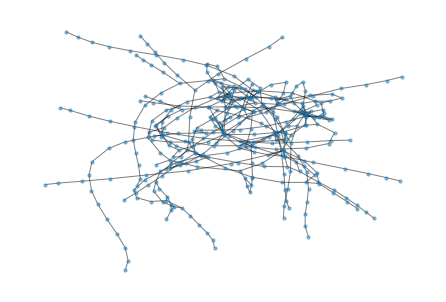

In [6]:
# Create new graph
g = net.Graph()

# Add edges
for e in edges:
    g.add_edge(e[0], e[1], weight=e[2])

# Draw the graph
net.draw(g, with_labels=False, node_size=10, font_size=8, alpha=0.5, width=1)


#### Graph metrics
Find the graph diameter, degree min and max, and closeness centrality.


In [8]:
# Graph diameter
print("diameter=" + str(net.diameter(g)))
print()

# Degree min and max
deg = dict(net.degree(g))
print("degree min=" + str(min(deg.values())))
print("degree max=" + str(max(deg.values())))
print()

# Closeness centrality
c = net.closeness_centrality(g)
cs = sorted(c.items(), key=lambda item: item[1], reverse=True)
print("closeness centrality (top 10):")
for i in range(0, 10):
    print('\t', nodes[cs[i][0]], cs[i][1])
print("Note: some node names are repeated because some stations have different stops depending on the metro line\n" + \
    "\tand are listed as separate nodes in the data.")
print()


diameter=38

degree min=1
degree max=6

closeness centrality (top 10):
	 Madeleine 0.11315630657815329
	 Châtelet 0.11301989150090416
	 Pyramides 0.11207411835026898
	 Madeleine 0.11114404267931238
	 Châtelet 0.11039152193111569
	 Madeleine 0.11026168773890033
	 Châtelet 0.10939323220536756
	 Châtelet 0.10897994768962511
	 Concorde 0.10863267670915411
	 Opéra 0.10841283607979185
Note: some node names are repeated because some stations have different stops depending on the metro line
	and are listed as separate nodes in the data.

